# 40-unsupervised-modeling

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib as mpl
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

## Impute language column and exclude genre_2 and genre_3

In [4]:
###################### Don't run ########################
#data = pd.read_csv("Data/model_data.csv")
#data = data.drop(columns=['genre_2', 'genre_3'])
#data.at[120, 'language'] = "Russian"
#data.at[418, 'language'] = "Swedish"
#data = data.fillna(value = {'language': "English"})
#data[data['language'].isna()]
#data.to_csv("Data/model_data.csv", index=False)
###################### Don't run ########################

## Kmode model for categorical variables

In [5]:
data = pd.read_csv("Data/model_data.csv")
cat_data = data[['country', 'language', 'director', 'genre_1']]
cat_data

,country,language,director,genre_1
0,USA,English,Lewis Milestone,Adventure
1,"UK, USA",English,Jill Sprecher,Comedy
2,USA,English,Henry Levin,Drama
3,USA,English,William Castle,Horror
4,Germany,German,Christoph Stark,Drama
...,...,...,...,...
3032,USA,"English, Spanish",George Gallo,Action
3033,USA,English,Jon Favreau,Action
3034,USA,English,Alan Rafkin,Action
3035,USA,English,Ole Bornedal,Drama


## How many unique country, language, director and genre_1

In [14]:
# Print all frequency of all unique country
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cat_data['country'].value_counts())

USA                                                                                    1618
UK                                                                                      136
UK, USA                                                                                  73
France                                                                                   68
Japan                                                                                    66
Italy                                                                                    60
India                                                                                    48
Canada                                                                                   41
USA, Canada                                                                              31
Australia                                                                                30
Hong Kong                                                                       

In [15]:
# Print all frequency of all unique language
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cat_data['language'].value_counts())

English                                                                                                       1860
English, Spanish                                                                                                89
French                                                                                                          74
English, French                                                                                                 71
Japanese                                                                                                        54
Italian                                                                                                         50
English, Italian                                                                                                43
Spanish                                                                                                         37
Hindi                                                                           

In [17]:
# Print all frequency of all unique director
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cat_data['director'].value_counts())

William A. Wellman                                     10
Blake Edwards                                           8
Alfred Hitchcock                                        8
Lewis Milestone                                         7
Sidney Lumet                                            7
Martin Scorsese                                         7
Raoul Walsh                                             7
Robert Altman                                           7
Mervyn LeRoy                                            7
Herbert Ross                                            6
James Ivory                                             6
Fritz Lang                                              6
John Irvin                                              6
William A. Seiter                                       6
Albert Pyun                                             6
Robert Benton                                           6
Woody Allen                                             6
Mike Nichols  

In [18]:
# Print all frequency of all unique genre_1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cat_data['genre_1'].value_counts())

Comedy       855
Drama        702
Action       515
Crime        279
Horror       211
Adventure    178
Biography     89
Animation     77
Mystery       25
Western       22
Fantasy       21
Sci-Fi        19
Thriller      15
Family         8
Musical        7
Romance        7
Film-Noir      5
Music          1
History        1
Name: genre_1, dtype: int64


## Use Elbow plot to decide how many clusters k we choose

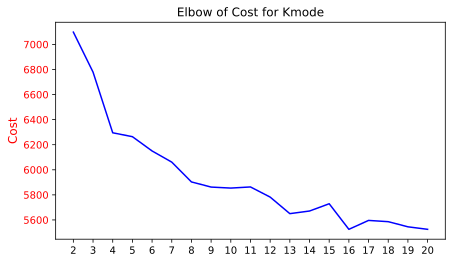

In [59]:
cost = []
start = 2
end = 20
for i in range(start, end+1):
    km = KModes(n_clusters=i, init='Huang', n_init=10, verbose=0)
    clusters = km.fit_predict(cat_data)
    cost.append(km.cost_)

fig = plt.figure(figsize=(7,4));
ax1 = plt.subplot();
ax1.plot(cost, color = 'blue');
ax1.set_ylabel('Cost', color='red', fontsize=12);
ax1.tick_params(axis='y', labelcolor='red');
plt.xticks(ticks=range(len(cost)), labels=range(start, end+1));
ax1.set_title('Elbow of Cost for Kmode');

### We choose 16 clusters as our final K for K-modes

In [6]:
km = KModes(n_clusters=16, init='Huang', n_init=10, verbose=0)
clusters = km.fit_predict(cat_data)
print(km.cost_)
print(km.cluster_centroids_)

5637.0
[['USA' 'English' 'Tobe Hooper' 'Horror']
 ['USA' 'English' 'Fritz Lang' 'Crime']
 ['USA' 'English' 'Blake Edwards' 'Comedy']
 ['USA' 'English' 'Charles Jarrott' 'Biography']
 ['UK, USA' 'English' 'James Ivory' 'Drama']
 ['USA' 'English' 'Mark Robson' 'Drama']
 ['USA' 'English' 'Joel Silberg' 'Comedy']
 ['USA' 'English, German' 'Tim Blake Nelson' 'Drama']
 ['USA' 'English, German' 'Leslie Fenton' 'Drama']
 ['Australia' 'English' 'Alex Proyas' 'Comedy']
 ['USA' 'English' 'Mikhail Kalatozov' 'Adventure']
 ['USA' 'English' 'Joseph L. Mankiewicz' 'Crime']
 ['Japan' 'Japanese' 'Akira Kurosawa' 'Animation']
 ['USA' 'English' 'Albert Pyun' 'Action']
 ['USA' 'English, French' 'Alan Bunce' 'Horror']
 ['USA' 'English' 'Harry Basil' 'Comedy']]


## Split data by cluster number and write them our to a directory called cluster16_kmode

In [9]:
new_clusters = pd.DataFrame({'id' : data['id'], 'cluster' : clusters})
grouped = data.merge(new_clusters, how="inner", on = "id").groupby('cluster')
for i in range(16):
    temp = grouped.get_group(i).drop(columns=['cluster','country','language','director','genre_1'])
    temp.to_csv("Data/cluster16_kmode/" + "_".join(km.cluster_centroids_[i]) + ".csv", index=False)

In [11]:
# test one cluster dataset
pd.read_csv("Data/cluster16_kmode/Australia_English_Alex Proyas_Comedy.csv")

,id,review_1st,review_2nd,description_1st,description_2nd,overview_1st,overview_2nd,votes,reviews_from_critics,popularity,recommendation1,recommendation2,recommendation3,recommendation4,recommendation5,recommendation6
0,tt0209368,2.150259,10.545018,19.726930,-5.455270,12.821629,3.884157,5.85,6.0,0.789681,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0086189,2.564697,11.826079,17.725304,-1.400302,8.416253,2.102670,5.95,14.0,0.836124,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0071282,2.785506,12.815696,20.197195,-2.083678,11.286662,1.398177,5.35,53.0,2.030621,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0118929,5.834054,9.728271,21.665297,-4.888913,12.199282,0.805673,7.40,216.0,12.851984,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0119415,4.481330,12.581243,17.822450,-4.872606,10.605145,2.531681,4.30,2.0,0.197417,NaN,NaN,NaN,NaN,NaN,NaN
5,tt0115886,4.725617,13.972851,17.660118,-1.545692,10.737313,3.654059,5.80,24.0,1.129648,tt0120013,tt0084728,NaN,NaN,NaN,NaN
6,tt0106950,4.168309,13.176048,22.392670,-3.591580,10.012146,4.538598,5.80,74.0,5.970749,tt0100369,tt0114367,tt0102034,NaN,NaN,NaN
7,tt0448011,1.474544,11.858555,18.945044,0.470225,12.405038,2.041784,6.05,289.0,9.806904,NaN,NaN,NaN,NaN,NaN,NaN
8,tt0340110,3.477293,12.388887,19.638466,-4.960895,10.513731,2.887343,5.75,1.0,0.990990,NaN,NaN,NaN,NaN,NaN,NaN
9,tt0119272,1.107405,13.455965,20.504906,-2.541748,12.307556,2.641625,5.40,16.0,0.467352,tt0118772,NaN,NaN,NaN,NaN,NaN


In [12]:
pd.read_csv("Data/cluster16_kmode/Japan_Japanese_Akira Kurosawa_Animation.csv")

,id,review_1st,review_2nd,description_1st,description_2nd,overview_1st,overview_2nd,votes,reviews_from_critics,popularity,recommendation1,recommendation2,recommendation3,recommendation4,recommendation5,recommendation6
0,tt0065755,4.703332,11.987821,19.098112,-0.275216,8.493797,0.946554,5.55,42.0,0.006668,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0235712,2.625176,9.715470,18.694498,-3.391617,11.556692,0.379497,5.90,55.0,5.007142,tt0218553,tt0367913,NaN,NaN,NaN,NaN
2,tt0831888,2.722092,13.534211,19.660776,-1.570177,9.946698,1.462877,7.65,59.0,7.020628,tt0452039,tt0293416,NaN,NaN,NaN,NaN
3,tt0120408,1.987035,11.534046,21.911467,-3.440743,8.133011,3.564361,6.85,44.0,1.094509,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0158714,3.183090,14.088109,21.164620,-3.848197,8.101599,3.486126,7.75,116.0,7.228457,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,tt0891520,1.158029,13.506164,20.388882,-3.116375,11.561696,0.242390,5.15,48.0,1.367306,tt0367913,NaN,NaN,NaN,NaN,NaN
66,tt0781084,3.214348,12.551538,20.080477,-2.635944,8.159264,3.652219,5.20,41.0,1.079597,NaN,NaN,NaN,NaN,NaN,NaN
67,tt0164917,4.896729,11.823636,19.567472,0.310682,8.051706,1.126458,6.30,18.0,2.863839,tt0348121,tt0293416,NaN,NaN,NaN,NaN
68,tt0197213,1.220951,13.621513,20.043373,-2.759962,8.127473,3.515441,7.10,24.0,0.222935,NaN,NaN,NaN,NaN,NaN,NaN


## Give up!!!  k-prototypes for mixture of numeric and categorical variables

In [81]:
data_input = data.drop(columns = ['id', "recommendation1", 'recommendation2', 'recommendation3',
                                 'recommendation4', 'recommendation5', 'recommendation6'])
data_input = data_input.fillna(value = {'reviews_from_critics': np.mean(data_input['reviews_from_critics'])})

In [82]:
data_input

,review_1st,review_2nd,description_1st,description_2nd,overview_1st,overview_2nd,country,language,director,votes,reviews_from_critics,popularity,genre_1
0,4.942679,13.482060,17.669596,-0.738235,8.649476,3.307126,USA,English,Lewis Milestone,3.35,6.0,0.389810,Adventure
1,1.672779,11.368067,20.341370,-4.583504,12.137049,4.244494,"UK, USA",English,Jill Sprecher,6.05,43.0,1.885671,Comedy
2,3.586681,10.927030,20.424614,-2.285807,9.784697,2.606914,USA,English,Henry Levin,6.25,8.0,0.127452,Drama
3,5.692213,10.103884,21.787266,-3.158614,11.626658,0.298345,USA,English,William Castle,5.95,22.0,0.837849,Horror
4,5.052363,14.008677,19.101181,-5.684755,10.454543,5.274888,Germany,German,Christoph Stark,6.60,7.0,0.041677,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,3.672903,13.673236,20.537290,-1.603543,10.153371,1.411950,USA,"English, Spanish",George Gallo,5.50,46.0,3.067916,Action
3033,2.739948,14.026184,20.091590,-2.168772,8.163801,0.694519,USA,English,Jon Favreau,6.15,132.0,10.695639,Action
3034,3.020100,9.555977,21.206562,-0.786693,11.498743,3.363511,USA,English,Alan Rafkin,6.30,8.0,1.053244,Action
3035,4.831091,9.789382,22.496815,-2.224130,11.200775,-0.287683,USA,English,Ole Bornedal,6.20,52.0,6.122067,Drama


In [84]:
km = KPrototypes(n_clusters=8, init='Huang', n_init=3, verbose=0)
clusters = km.fit_predict(data_input, categorical=[6,7,8,12])
print(km.cost_)
print(km.cluster_centroids_)

577504.6229018696
[['3.5878624863636404' '12.001755996212092' '20.23835806818181'
  '-2.383196509196968' '10.73068518106061' '2.0354804269469735'
  '6.518939393939382' '172.86363636363637' '10.259918575757567' 'USA'
  'English' 'Brad Silberling' 'Comedy']
 ['3.430130285626242' '11.841369451292257' '19.95675749502981'
  '-2.728199232870777' '10.795848551888662' '2.2166231438866806'
  '6.121868787276343' '46.17711725018727' '3.9711280854870767' 'USA'
  'English' 'John Landis' 'Comedy']
 ['3.421533011279069' '11.781200306686047' '20.01531903197673'
  '-2.5952884222790673' '10.89728663866279' '2.032935119534884'
  '6.328633720930229' '75.16569767441861' '5.896201020348838' 'USA'
  'English' 'Woody Allen' 'Drama']
 ['3.290930895625001' '12.17942756250005' '19.901294437500123'
  '-1.5205883274999887' '9.721883312499934' '1.9042752540624859'
  '7.250000000000008' '392.8125' '26.47160612499999' 'USA' 'English'
  'George Lucas' 'Action']
 ['3.497697147587717' '11.790464524122795' '20.0988878421

In [86]:
pd.DataFrame({'id' : data['id'], 'cluster' : clusters})

,id,cluster
0,tt0018515,6
1,tt0118866,1
2,tt0050652,6
3,tt0051885,5
4,tt0248123,6
...,...,...
3032,tt0238948,1
3033,tt0406375,4
3034,tt0063591,6
3035,tt0119791,1
